# Spectral Clustering

### Tran Quoc Long - 14520490

## Bài tập 2: Handwritting digits

### K-means

In [19]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [21]:
digits = load_digits();
print(digits.data.shape);

(1797, 64)


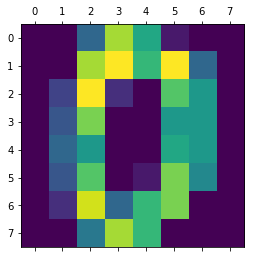

In [22]:
%matplotlib inline
#plt.gray(); 
plt.matshow(digits.images[0]);

In [23]:
nClusters = 10
model1 = KMeans(nClusters)
labels_kmeans = model1.fit_predict(digits.data)

In [24]:
df = pd.DataFrame({'labels':labels_kmeans,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)

Truth labels    0   1    2    3    4    5    6    7   8    9
labels                                                      
0               0   1   13  155    0    0    0    0   2    6
1               0   0    2   13    0   43    0    0  52  139
2               0   2    0    0    0    1  177    0   2    0
3               0  55    2    0    5    0    1    2   6   20
4               0  24  148    0    0    0    0    0   3    0
5               1   0    0    0  164    1    0    0   0    0
6               0  99    8    7    3    0    2    2  99    1
7             177   0    1    0    0    0    1    0   0    0
8               0   0    3    6    9    0    0  170   2    7
9               0   1    0    2    0  137    0    5   8    7


Predict Label: 7
Truth:  0


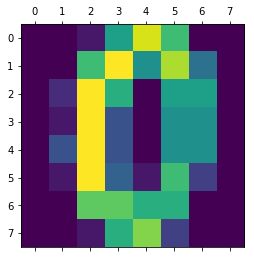

In [25]:
n = 10
%matplotlib inline
plt.matshow(digits.images[n])
print('Predict Label:', labels_kmeans[n])

print('Truth: ', digits.target[n])

### Visualization - Kmeans

In [26]:
#import libs
import numpy as np
from sklearn.decomposition import PCA

##### PCA

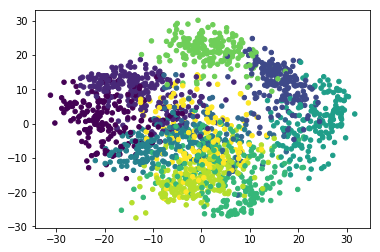

In [27]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
plt.show()

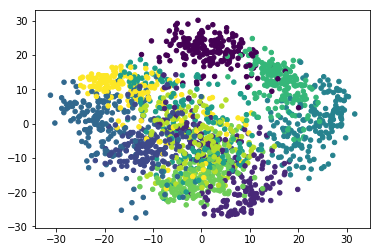

In [29]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
plt.show()

## Speactral clustering

In [44]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 

graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)

In [45]:
df1 = pd.DataFrame({'labels':label_spectral,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  58    5    5    1    0    0   15   40   36
1               0   0    1  146    0    0    0    0    6    2
2               0   0    0    4    0  157    0    0    3    3
3               0   2    0    1    0    2  172    0   13    0
4               0   0    0   16    0   20    2    0    7  133
5             177   0    1    0    1    1    0    0    0    3
6               0   0    2    2   11    0    0  154    3    2
7               0  36  115    4    0    0    0    0    1    0
8               1   0    0    0  163    2    0    0    0    0
9               0  86   53    5    5    0    7   10  101    1


lables_predict: 2
 True:  5


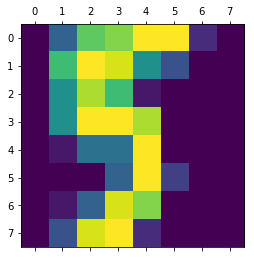

In [46]:
n = 15
plt.matshow(digits.images[n])
print('lables_predict:',label_spectral[n])
print(' True: ', digits.target[n])

#### Visualization - Spectral Clustering


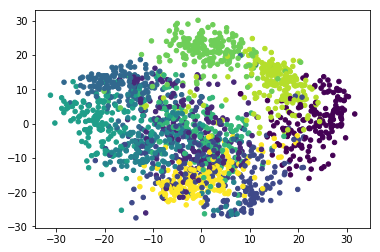

In [15]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
plt.show()

### Visualize results to compare - Using PCA

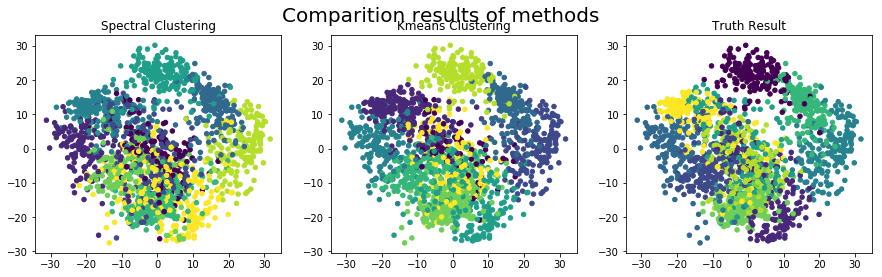

In [58]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(1,3,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(1,3,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('Kmeans Clustering')

ax = fig.add_subplot(1,3,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
ax.set_title('Truth Result')

### DBSCAN

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [27]:
digits = load_digits()
data = digits.data
data = StandardScaler().fit_transform(data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [28]:
print(data)

[[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]


In [45]:
db = DBSCAN(eps=1, min_samples=1,algorithm='kd_tree').fit(data)



In [46]:
print(db)

DBSCAN(algorithm='kd_tree', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=1, p=None)


In [47]:
print(db.labels_)
print(sum(db.labels_== -1))

[   0    1    2 ..., 1793 1794 1795]
0


In [48]:
import pandas as pd
df1 = pd.DataFrame({'labels':db.labels_,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels  0  1  2  3  4  5  6  7  8  9
labels                                    
0             1  0  0  0  0  0  0  0  0  0
1             0  1  0  0  0  0  0  0  0  0
2             0  0  1  0  0  0  0  0  0  0
3             0  0  0  1  0  0  0  0  0  0
4             0  0  0  0  1  0  0  0  0  0
5             0  0  0  0  0  1  0  0  0  0
6             0  0  0  0  0  0  1  0  0  0
7             0  0  0  0  0  0  0  1  0  0
8             0  0  0  0  0  0  0  0  1  0
9             0  0  0  0  0  0  0  0  0  1
10            1  0  0  0  0  0  0  0  0  0
11            0  1  0  0  0  0  0  0  0  0
12            0  0  1  0  0  0  0  0  0  0
13            0  0  0  1  0  0  0  0  0  0
14            0  0  0  0  1  0  0  0  0  0
15            0  0  0  0  0  1  0  0  0  0
16            0  0  0  0  0  0  1  0  0  0
17            0  0  0  0  0  0  0  1  0  0
18            0  0  0  0  0  0  0  0  1  0
19            0  0  0  0  0  0  0  0  0  1
20            1  0  0  0  0  0  0  0  0  0
21         

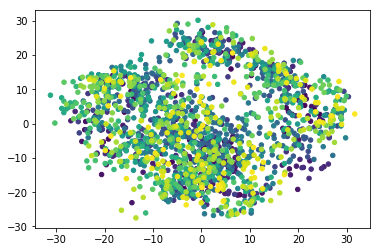

In [49]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= db.labels_, s=20)
plt.show()

## Agglomerative Clustering

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
Agglomerative_model = AgglomerativeClustering(n_clusters = 10)

In [58]:
db = Agglomerative_model.fit(data)

In [59]:
print(db.labels_)

[5 1 1 ..., 1 1 1]


In [60]:
import pandas as pd
df1 = pd.DataFrame({'labels':db.labels_,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0    1    2    3    4    5    6    7    8    9
labels                                                        
0               0    1    0    0    1  168    0    1    1    3
1               0  150   15   11    4    0    1    1  168   38
2               0    0    1    0    1    0    0    0    0    0
3               0   27  160    4    0    1    0    0    3    0
4               0    0    1  168    0   12    0    1    2  135
5             178    0    0    0    0    0    0    0    0    0
6               0    0    0    0    0    1  180    0    0    1
7               0    0    0    0   12    0    0   25    0    3
8               0    4    0    0  163    0    0    0    0    0
9               0    0    0    0    0    0    0  151    0    0


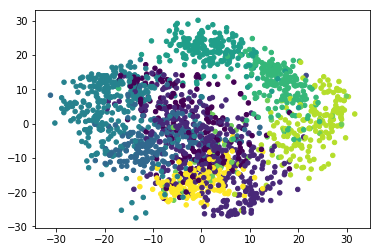

In [61]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= db.labels_, s=20)
plt.show()

## Comparison of cluster methods

In [84]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
digits = load_digits();
print(digits.data.shape);

(1797, 64)


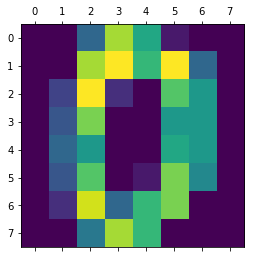

In [87]:
%matplotlib inline
#plt.gray(); 
plt.matshow(digits.images[0]);

### Clustering

In [100]:
#Kmeans
nClusters = 10
t0 = time()
kmeans_model = KMeans(nClusters)
t_kmeans = time()- t0
labels_kmeans = kmeans_model.fit_predict(digits.data)

In [101]:
#Spectral_clustering
t0 = time()
graph = cosine_similarity(digits.data)
t_spectral = time()- t0
labels_spectral = spectral_clustering(graph, n_clusters=10)

In [102]:
#DBSCAN
data = digits.data
t0 = time()
data = StandardScaler().fit_transform(data)
labels_dbscan = DBSCAN(eps=1, min_samples=1,algorithm='kd_tree').fit_predict(data)
t_dbscan = time()- t0

In [103]:
#Agglomerative Clustering
t0 = time()
Agglomerative_model = AgglomerativeClustering(n_clusters = nClusters)
labels_AgglomerativeClustering = Agglomerative_model.fit_predict(data)
t_agg = time() - t0

### Cross table

In [104]:
#Kmeans
print('Kmeans:\n')
df1 = pd.DataFrame({'labels':labels_kmeans,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

#Spectral clustering
print('\n\n\n')
print('Spectral clustering:\n')
df1 = pd.DataFrame({'labels':labels_spectral,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

#DBSCAN
print('\n\n\n')
print('DBSCAN:\n')
df1 = pd.DataFrame({'labels':labels_dbscan,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

#Agglomerative Clustering
print('\n\n\n')
print('Agglomerative Clustering:\n')
df1 = pd.DataFrame({'labels':labels_AgglomerativeClustering,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Kmeans:

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  99    8    7    3    0    2    2  102    2
1               0   0    2   11    0   42    0    0   48  139
2               0   0    3    7    9    0    0  175    5    7
3               0   1   13  155    0    1    0    0    4    6
4               0  55    2    0    5    0    1    2    6   20
5               0   2    0    0    0    1  177    0    2    0
6             177   0    1    0    0    0    1    0    0    0
7               1   0    0    0  164    2    0    0    0    0
8               0   1    0    2    0  136    0    0    4    6
9               0  24  148    1    0    0    0    0    3    0




Spectral clustering:

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0             177   0    1    0    1    1    0    0    0    3
1               1   0    0    0  16

### Comparison

In [112]:
#print frame
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


data = digits.data
#define a function to measure and print out
def bench_clustering(method_name, time_, labels):
    print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (method_name, time_,
             metrics.homogeneity_score(digits.target, labels),
             metrics.completeness_score(digits.target, labels),
             metrics.v_measure_score(digits.target, labels),
             metrics.adjusted_rand_score(digits.target, labels),
             metrics.adjusted_mutual_info_score(digits.target,  labels),
             metrics.silhouette_score(data, labels,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

#Kmeans
bench_clustering('K-means', t_kmeans, labels_kmeans)
#Spectral_clustering
bench_clustering('spectral', t_spectral, labels_spectral)

#Agglomerative clustering
bench_clustering('Agg.', t_agg, labels_AgglomerativeClustering)
#DBSCAN ==> Problems with raw data
#bench_clustering('DBSCAN', t_dbscan, labels_dbscan)
print('-----------\nProblems with raw data cause noise with DBSCAN method')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
K-means  	0.00s	0.739	0.747	0.743	0.669	0.736	0.178
spectral 	0.03s	0.711	0.716	0.713	0.625	0.708	0.165
Agg.     	0.15s	0.758	0.836	0.796	0.664	0.756	0.127
-----------
Problems with raw data cause noise with DBSCAN method


### Visualization

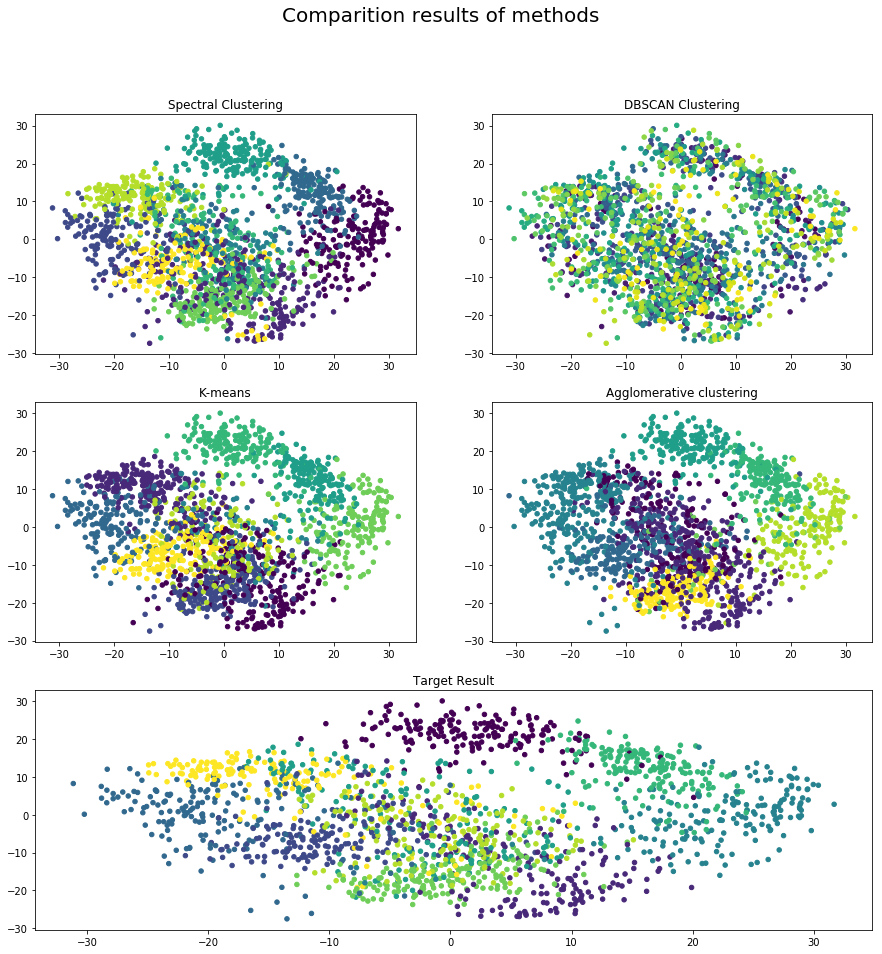

In [149]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(3,2,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3,2,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_dbscan, s=20)
ax.set_title('DBSCAN Clustering')

ax = fig.add_subplot(3,2,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('K-means')

ax = fig.add_subplot(3,2,4)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_AgglomerativeClustering, s=20)
ax.set_title('Agglomerative clustering')

ax = fig.add_subplot(3,1,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
ax.set_title('Target Result')
